<a href="https://colab.research.google.com/github/Sairam-KSR/Patient-data-Understanding-Data-Analysis/blob/main/PDU_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Healthcare/Medical Data

**a. The dataset needs to be healthcare, medical or even research data that is
related to medicine.**

Ans: The dataset is 'Sleep Health and Lifestyle.



**b. Need to have at least 100 rows of data, and 5 columns. You can take two
different datasets and make relevant comparisons/correlations, or grab from
different sources and combine them.**

Ans: The Dataset consists of 374 Rows and 13 Columns

**c. Provide a brief description of your data.**

Ans:

Person ID: Unique identifier for each person.

Gender: Gender of the person (Male/Female).

Age: Age of the person.

Occupation: Occupation of the person.

Sleep Duration: Average hours of sleep per night (in hours).

Quality of Sleep: A numeric rating of sleep quality.

Physical Activity Level: Numeric score representing the level of physical activity.

Stress Level: Numeric rating of stress level.

BMI Category: Body Mass Index category (e.g., Underweight, Normal, Overweight, Obese).

Blood Pressure: Recorded blood pressure (systolic/diastolic).

Heart Rate: Average heart rate (beats per minute).

Daily Steps: Number of steps taken daily.

Sleep Disorder: Type of sleep disorder if any (e.g., None, Sleep Apnea).

#2. Data Collection:

**a. Provide source(s)/methods of your data/data collection**

i. Links like Kaggle. CDC, WHO, etc. If text mined, or used an API or NLP,
provide a brief summary

Sleep Health and Lifestyle Dataset

My data set link from Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-datasetLinks

My Data set Drive Link: https://drive.google.com/file/d/1tsZ-nkdfnnq21tr_-8bNKrEbYo3iX4M9/view?usp=drive_linkLinks

#3. Data Cleaning/Wrangling/Data “Manipulation”



**a. Provide a brief description how you cleaned, and wrangled the data such as removing columns not needed, combining two datasets, standardizing different formats, etc. If data is already cleaned, state that it is so.**

**Check for Duplicate Rows:** Identify and remove any duplicate rows to ensure each entry is unique.

**Handle Missing Data**: Identify missing values and decide on a strategy for handling them, such as imputing missing values or removing rows/columns with missing data.

**Remove Unnecessary Columns**: If there are columns not relevant to the analysis, such as "Person ID," they might be removed.

**Standardize Formats:**
Convert the "Blood Pressure" column into two separate columns, "Systolic BP" and "Diastolic BP," for better analysis.

**Merging the data** : In BMI category there are 2 common categories (Normal and Normal Weight) So merging is required.

**Ensure consistent format** for categorical variables (e.g., "Gender," "Occupation," "BMI Category," "Sleep Disorder") possibly by converting them to a standard case (e.g., all lower case).


**Data Type Conversion**: Ensure each column is of the appropriate data type for analysis, e.g., converting "Age" and "Sleep Duration" to numeric types if they are not already.

 Importing Required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Loading Data Set

In [10]:
url="https://raw.githubusercontent.com/Sairam-KSR/Patient-data-Understanding-Data-Analysis/main/Sleep_health_and_lifestyle_dataset.csv"
df= pd.read_csv(url)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Data Cleaning or Wrangling

In [12]:
df.count()

Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             155
dtype: int64

Dropping Duplicates


In [13]:
## Data Cleaning
df_cleaned=df.drop_duplicates()
df_cleaned.count()

Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             155
dtype: int64

 Missing Data Check

In [14]:
#Missing data check
missing_data_check=df_cleaned.isnull().sum()
print(missing_data_check)
# There are total 219 Missing data in Sleep Disorder

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


 Data Type Conversion




 Ensuring 'Age' and 'Sleep Duration' are numeric has already been displayed as numeric, so no action needed here.

Since we're analyzing the data as is, we won't remove any columns in this demonstration.

 But normally, if a column like 'Person ID' isn't needed for analysis, it could be dropped.

 Checking BMI category and merging the similar categories

In [15]:
#Checking Unique vale of BMI Category
df_cleaned['BMI Category'].unique()


array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [16]:
#As we can see here there are 2 values which means the same (Normal and Normal weight). So we need to merge them
df_cleaned['BMI Category']=df_cleaned['BMI Category'].replace('Normal Weight','Normal')
df_cleaned['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

 Creating two new columns(Systolic BP and Diastolic BP) to split from Blood pressure

In [17]:
df_cleaned[['Systolic BP','Diastolic BP']]=df['Blood Pressure'].str.split('/',expand=True).apply(pd.to_numeric)


**b. Creation of variables/indicators, etc. The created variables/indicators can be a part of the required 5 columns.**

**BMI Category Numerical**: Create a numerical variable for "BMI Category" where normal = 1, overweight = 2, and obese = 3. This will facilitate quantitative analysis.

**Stress Level Indicator**: Develop an indicator variable for high stress level, perhaps defined as a "Stress Level" of 7 or above.

**Active Lifestyle Indicator**: Create a binary variable indicating whether a person has an active lifestyle, possibly based on "Physical Activity Level" and "Daily Steps" thresholds.

**Blood Pressure Category**: Categorize "Blood Pressure" into normal, elevated, and high based on "Systolic BP" and "Diastolic BP" values.

**Sleep Quality Indicator**: Define an indicator for good sleep quality, possibly based on a combination of "Sleep Duration" and "Quality of Sleep" scores.

BMI Category Numerical


In [18]:
bmi_mapping = { 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df_cleaned['BMI Category Numerical'] = df_cleaned['BMI Category'].map(bmi_mapping)


Creating new columns for stress level indicator

In [19]:
df_cleaned['High Stress']=df_cleaned['Stress Level']>=7


Active Life style

In [20]:
df_cleaned['Active Lifestyle']=(df_cleaned['Daily Steps']>=5000) & (df_cleaned['Physical Activity Level']>=40)


Blood Pressure Category (simplified version for demonstration)

In [21]:
df_cleaned['BP Category'] = pd.cut(x=df_cleaned['Systolic BP'], bins=[0, 120, 130, 140, float('inf')],
                                    labels=['normal', 'elevated', 'high BP stage 1', 'high BP stage 2'], right=False)


Sleep Quality Indicator

In [22]:
df_cleaned['Good Sleep Quality']=(df_cleaned['Quality of Sleep']>=5) & (df_cleaned['Sleep Duration']>=7 )


#4. Data Dictionary

**a. Your variables and their meaning.**

***Original Variables:***

**Person ID**: A unique identifier for each participant in the dataset.
**Gender:** The gender of the participant (e.g., male, female).

**Age**: The age of the participant.

**Occupation**: The occupation of the participant (e.g., software engineer, doctor).

**Sleep Duration**: The average number of hours the participant sleeps per night.
Quality of Sleep: A subjective rating of the participant's sleep quality on a scale from 1 to 10.

**Physical Activity Level**: A measure of the participant's physical activity, with higher numbers indicating higher levels of activity.

**Stress Level**: A subjective rating of the participant's stress level on a scale from 1 to 10.

**BMI Category**: The Body Mass Index category of the participant (e.g.,normal, overweight, obese).

**Blood Pressure**: The participant's blood pressure reading, given as systolic over diastolic pressure (e.g., 120/80).

**Heart Rate**: The participant's average heart rate in beats per minute.

**Daily Steps**: The average number of steps the participant takes each day.

**Sleep Disorder**: Indicates whether the participant has a diagnosed sleep disorder (e.g., sleep apnea, insomnia).

***Derived Variables:***

**Systolic BP**: The systolic blood pressure of the participant extracted from the "Blood Pressure" variable.

**Diastolic BP**: The diastolic blood pressure of the participant extracted from the "Blood Pressure" variable.

**BMI Category Numerical**: A numerical representation of the "BMI Category" where normal = 1, overweight = 2, and obese = 3.
High Stress: A binary indicator variable for high stress levels, where a stress level of 7 or above is considered high (1 for high stress, 0 for not high stress).

**Active Lifestyle**: A binary variable indicating whether a participant leads an active lifestyle based on "Physical Activity Level" and "Daily Steps" (1 for active, 0 for not active). For this analysis, active is defined as having a physical activity level of 40 or above and taking 5,000 steps or more daily.

**BP Category**: Categorizes "Blood Pressure" into normal, elevated, high BP stage 1, and high BP stage 2 based on "Systolic BP."

**Good Sleep Quality**: A binary indicator for good sleep quality, defined as having a sleep duration of 7 hours or more and a sleep quality rating of 5 or above (1 for good quality sleep, 0 for not).

#5. Data Analysis



**a. Provide 10 relevant or important questions/hypotheses that your data can
answer.**

1.Is there a correlation between sleep duration and quality of sleep?

2.Do people with an active lifestyle have lower stress levels compared to those who are not active?

3.Is there a relationship between BMI category and sleep disorders?

4.How does blood pressure category relate to sleep quality?

5.What are the main characteristics of participants reporting high stress levels?

6.Is there a significant difference in heart rate between participants with and without sleep disorders?

7.Do sleep duration and quality vary significantly across different occupations?

8.Can we predict the likelihood of having a sleep disorder based on lifestyle and health indicators?

9.What is the impact of age on sleep quality and duration?

10.Does gender play a role in physical activity levels and its effect on sleep health?









**b. Provide answers to your given questions using statistics/visualizations/charts.**

1.Is there a correlation between sleep duration and quality of sleep?


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Text(0.5, 1.0, 'Sleep Duration vs Quality of Sleep\nCorrelation: 0.88')

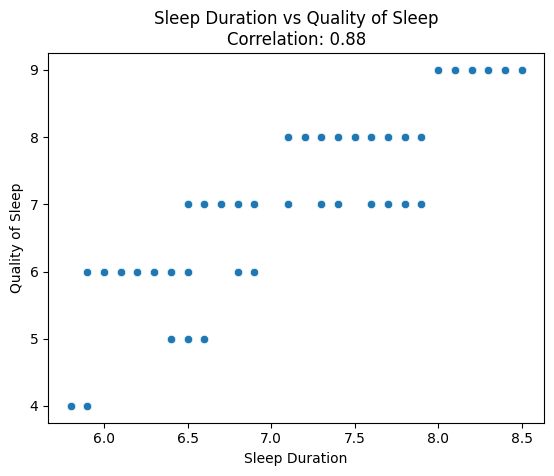

In [24]:
# Coorelation between sleep duration and quality of sleep
correlation_sleep=df_cleaned['Sleep Duration'].corr(df_cleaned['Quality of Sleep'])
plt.subplot(1,1,1)
sns.scatterplot(x='Sleep Duration',y='Quality of Sleep',data=df_cleaned)
plt.title(f'Sleep Duration vs Quality of Sleep\nCorrelation: {correlation_sleep:.2f}')


The Pearson correlation coefficient between sleep duration and quality of sleep is 0.88, indicating a strong positive correlation. This suggests that as sleep duration increases, the quality of sleep also tends to improve.

The scatter plot visually supports this relationship, showing a trend where higher sleep durations are associated with higher sleep quality ratings.

2.Do people with an active lifestyle have lower stress levels compared to those who are not active?


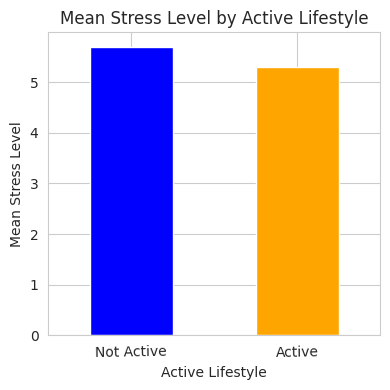

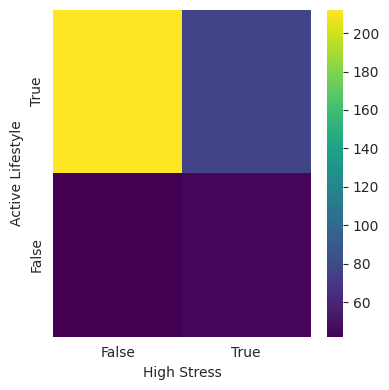

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
active_stress_mean=df_cleaned.groupby('Active Lifestyle')['Stress Level'].mean()
plt.subplots(1, 1, figsize=(4, 4))
active_stress_mean.plot(kind='bar',color=['blue','orange'])
plt.title('Mean Stress Level by Active Lifestyle')
plt.ylabel('Mean Stress Level')
plt.xticks(ticks=[0,1],labels=['Not Active','Active'],rotation=1)
plt.tight_layout()
plt.show()

# High Stress vs Active Lifestyle


plt.subplots(1, 1, figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Active Lifestyle'].value_counts()
    for x_label, grp in df_cleaned.groupby('High Stress')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('High Stress')
_ = plt.ylabel('Active Lifestyle')


plt.tight_layout()
plt.show()

Statistical test for active lifestyle and stress level

In [26]:
t_stat,p_value=stats.ttest_ind(df_cleaned[df_cleaned['Active Lifestyle']==True]['Stress Level'],
                               df_cleaned[df_cleaned['Active Lifestyle']==False]['Stress Level']
                               )
correlation_sleep,active_stress_mean,t_stat,p_value
print('Correlation sleep Duration and Quality of sleep:',correlation_sleep)
print('Active stress mean:',active_stress_mean)
print('T-Stats:',t_stat)
print('P-Value:',p_value)

Correlation sleep Duration and Quality of sleep: 0.8832130004106171
Active stress mean: Active Lifestyle
False    5.697674
True     5.291667
Name: Stress Level, dtype: float64
T-Stats: -1.868126280133913
P-Value: 0.06253041447881279


The mean stress level for participants with an active lifestyle is 5.29, compared to 5.70 for those who are not active. This indicates that participants who are active tend to report slightly lower stress levels.
The bar plot illustrates this difference in mean stress levels based on active lifestyle status. However, it's worth noting that the difference is relatively small.

The independent samples t-test between stress levels of active and non-active participants gives a t-statistic of -1.87 and a p-value of 0.063. This suggests that there is no statistically significant difference in stress levels between the two groups at the conventional 0.05 significance level, but it is close to being significant.

3.Is there a relationship between BMI category and sleep disorders?


Chi-2 : 0.6513274354844121
P value : 0.7220479585273512
degrees of freedom value : 2
Expected frequency : [[ 7.9483871   8.0516129 ]
 [ 4.96774194  5.03225806]
 [64.08387097 64.91612903]]


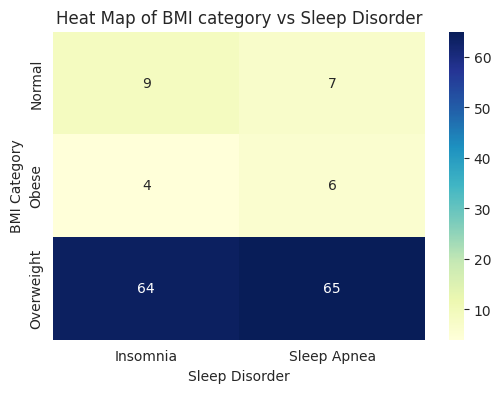

In [42]:
# Relation between BMI category and Sleep Disorders
contingency_table=pd.crosstab(df_cleaned['BMI Category'],df_cleaned['Sleep Disorder'])

#Performing Chi Squarre test
chi2,p,dof,expected=stats.chi2_contingency(contingency_table)

#Plotting the contingency table as heat map
plt.figure(figsize=(6,4))
sns.heatmap(contingency_table,annot=True,cmap='YlGnBu',fmt="d")
plt.title("Heat Map of BMI category vs Sleep Disorder")
#plt.xlable("Sleep Disorder")
#plt.ylable("BMI Category")
#plt.show()
#chi2, p, dof, expected

print("Chi-2 :",chi2)
print("P value :",p)
print("degrees of freedom value :",dof)
print("Expected frequency :",expected)

Chi-square statistic (χ²): 0.6513274354844121

This value measures the difference between the observed frequencies and the expected frequencies if there were no association between the two variables. A lower chi-square value indicates a smaller difference, suggesting that the observed data are closer to what would be expected if the variables were independent of each other.
P-value: 0.7220479585273512

The p-value tells you the probability of observing a chi-square statistic as extreme as, or more extreme than, the one calculated, under the assumption that the null hypothesis is true (i.e., assuming that there is no association between the two variables). A high p-value, like yours (0.722), suggests that the observed association could easily occur by chance if the null hypothesis were true. Typically, a p-value threshold of 0.05 is used to determine statistical significance. Since your p-value is well above 0.05, you would not reject the null hypothesis and conclude that there is no statistically significant association between the variables based on this test.
Degrees of Freedom (df): 2

The degrees of freedom for a chi-square test in this context are calculated based on the number of levels or categories each variable has, minus one, and then multiplied together if you have a contingency table larger than 2x2. For a simple 2x2 table, it's (rows - 1) * (columns - 1). In your case, a df of 2 suggests a certain level of complexity in the table, likely more than two categories for at least one of the variables, but not a large table.
Expected Frequencies:

The expected frequencies are what you would expect to observe in each category if the two variables were indeed independent of each other. These are calculated based on the marginal totals of the table and the overall total. Your expected frequencies show what the distribution of counts would look like under the null hypothesis.
For Category 1: Expected to see about 7.95 in one group and 8.05 in the other.
For Category 2: Expected to see about 4.97 in one group and 5.03 in the other.
For Category 3: Expected to see about 64.08 in one group and 64.92 in the other.

Conclusion:
Your chi-square test results suggest that there is no statistically significant association between the two variables you tested. The observed differences between the groups could reasonably occur by chance, and the variables appear to be independent of each other within the context of this dataset.








4.How does blood pressure category relate to sleep quality?



<ipython-input-51-1c5ae02207e7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BP Category', y='Sleep Duration', data=bp_sleep_duration, ax=ax[0], palette='coolwarm')
<ipython-input-51-1c5ae02207e7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BP Category', y='Quality of Sleep', data=bp_sleep_quality, ax=ax[1], palette='coolwarm')


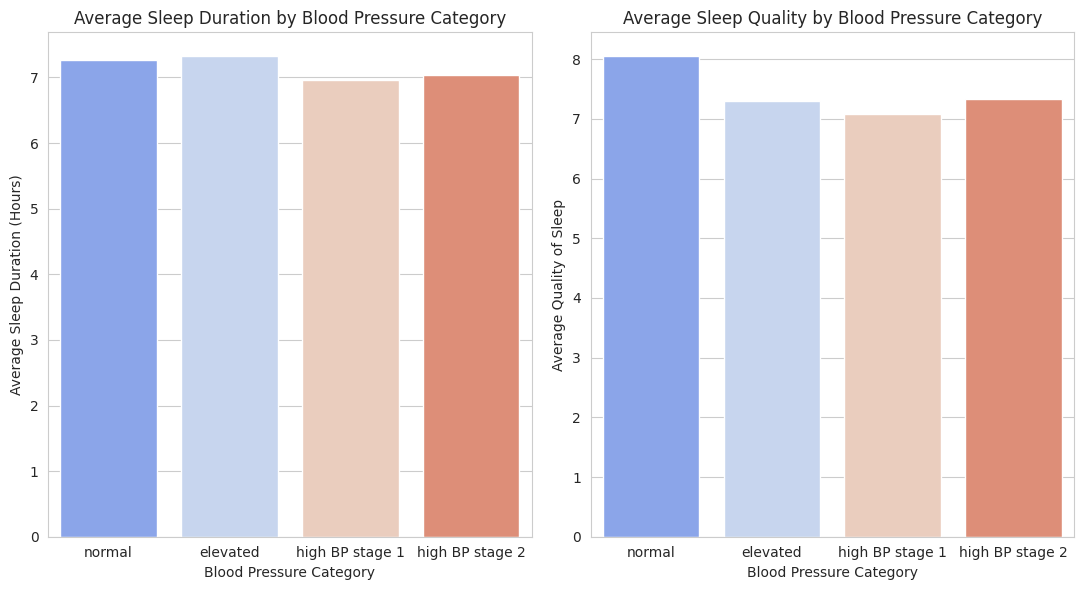

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare data for visualization
# Grouping the data by BP Category and calculating mean for Sleep Duration and Quality of Sleep
bp_sleep_duration = df_cleaned.groupby('BP Category')['Sleep Duration'].mean().reset_index()
bp_sleep_quality = df_cleaned.groupby('BP Category')['Quality of Sleep'].mean().reset_index()

# Creating the visualizations
fig, ax = plt.subplots(1, 2, figsize=(11, 6))

# Plot for Sleep Duration by BP Category
sns.barplot(x='BP Category', y='Sleep Duration', data=bp_sleep_duration, ax=ax[0], palette='coolwarm')
ax[0].set_title('Average Sleep Duration by Blood Pressure Category')
ax[0].set_xlabel('Blood Pressure Category')
ax[0].set_ylabel('Average Sleep Duration (Hours)')
ax[0].tick_params(axis='x', rotation=0)

# Plot for Sleep Quality by BP Category
sns.barplot(x='BP Category', y='Quality of Sleep', data=bp_sleep_quality, ax=ax[1], palette='coolwarm')
ax[1].set_title('Average Sleep Quality by Blood Pressure Category')
ax[1].set_xlabel('Blood Pressure Category')
ax[1].set_ylabel('Average Quality of Sleep')
ax[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


The Average Sleep Duration by Blood Pressure Category chart reveals variations in sleep duration across different blood pressure categories. It's insightful to see how these categories compare in terms of how long people sleep on average.

The Average Sleep Quality by Blood Pressure Category chart illustrates differences in the perceived quality of sleep across the blood pressure categories, indicating how well people feel they sleep.

5.What are the main characteristics of participants reporting high stress levels?


<ipython-input-60-52f72a511221>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(high_stress_data[characteristic], kde=True, ax=axes[i], palette='viridis', bins=20)
<ipython-input-60-52f72a511221>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=characteristic, data=high_stress_data, ax=axes[i], palette='viridis')
<ipython-input-60-52f72a511221>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(high_stress_data[characteristic], kde=True, ax=axes[i], palette='viridis', bins=20)
<ipython-input-60-52f72a511221>:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(high_stress_data[characteristic], kde=True, ax=axes[i], palette='viridis', bins=20)
<ipython-input-60-52f72a511221>:16: UserWarning: Ignoring

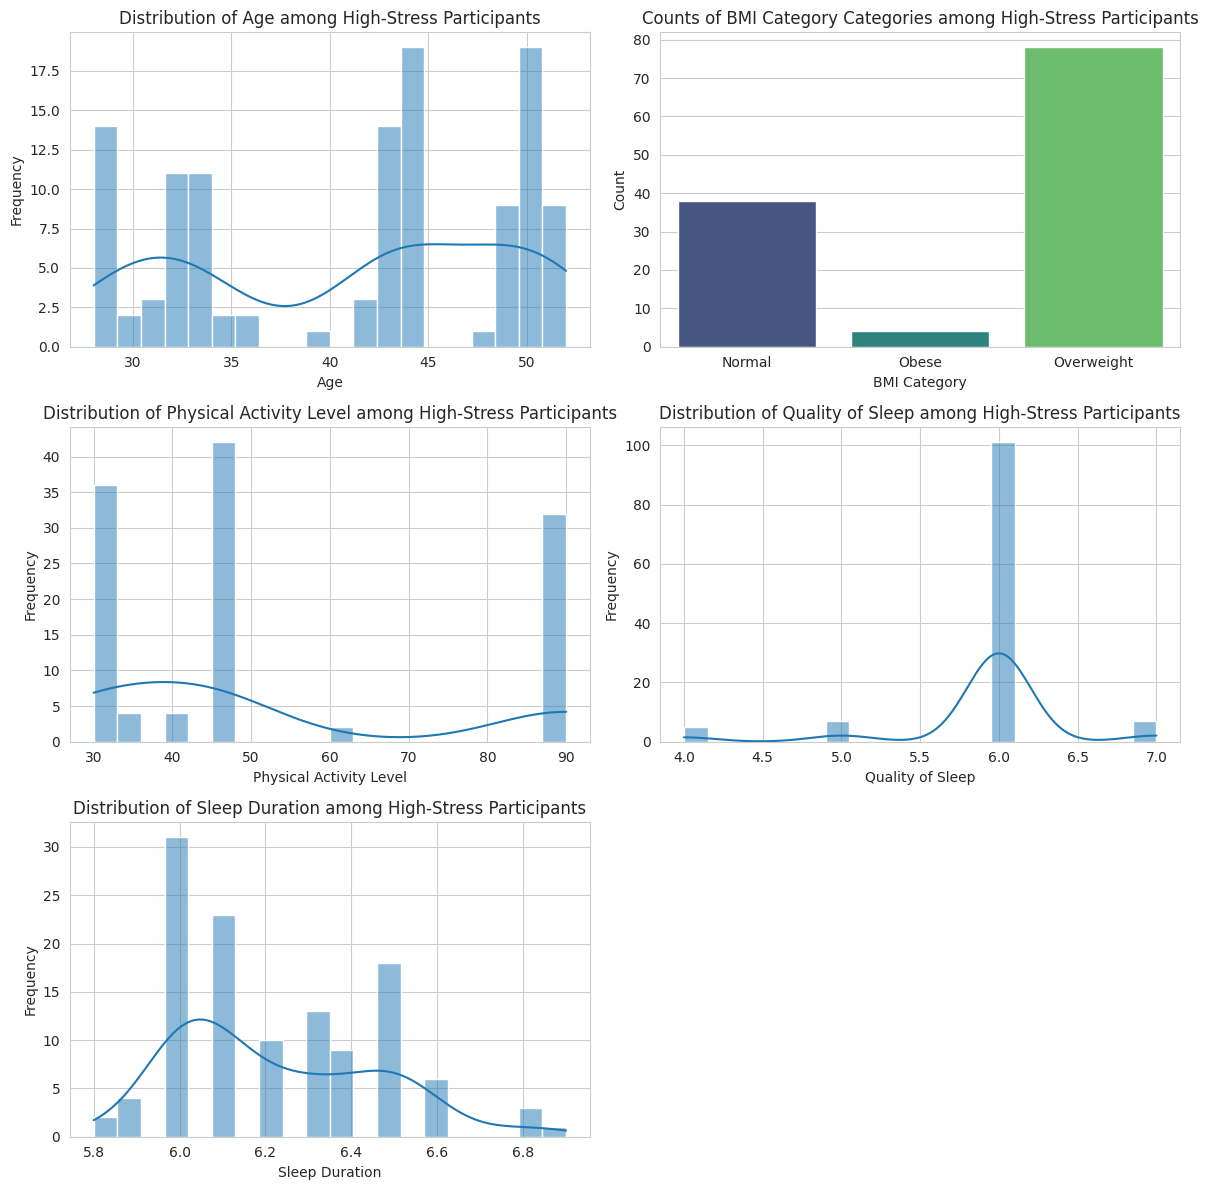

In [60]:
# Filter the data for participants reporting high stress levels
high_stress_data = df_cleaned[df_cleaned['High Stress'] == True]

# Define characteristics of interest
characteristics = ['Age', 'BMI Category', 'Physical Activity Level', 'Quality of Sleep', 'Sleep Duration']

# Prepare visualizations for these characteristics
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Remove the extra subplot (since we have an odd number of characteristics)
fig.delaxes(axes[-1])

for i, characteristic in enumerate(characteristics):
    if characteristic in ['Age', 'Physical Activity Level', 'Quality of Sleep', 'Sleep Duration']:
        sns.histplot(high_stress_data[characteristic], kde=True, ax=axes[i], palette='viridis', bins=20)
        axes[i].set_title(f'Distribution of {characteristic} among High-Stress Participants')
        axes[i].set_ylabel('Frequency')
    else:
        sns.countplot(x=characteristic, data=high_stress_data, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Counts of {characteristic} Categories among High-Stress Participants')
        axes[i].set_xlabel(characteristic)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


**Age Distribution:** The histogram for age shows the spread of ages among participants who report high stress levels, indicating whether certain age groups are more prevalent.

**BMI Category Counts:** This count plot shows the distribution of participants across different BMI categories, highlighting which BMI classifications are most common among those reporting high stress.

**Physical Activity Level Distribution:** This plot illustrates the distribution of physical activity levels among high-stress participants, indicating how physically active they are on average.

**Quality of Sleep Distribution:** The histogram for the quality of sleep shows how participants rate their sleep quality, giving an idea of sleep satisfaction among those with high stress.

**Sleep Duration Distribution:** This histogram showcases the range of sleep durations, indicating whether high-stress individuals tend to sleep more, less, or about the same as general recommendations.

6.Is there a significant difference in heart rate between participants with and without sleep disorders?


<ipython-input-30-6179def95d9f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df_cleaned, palette='coolwarm')
<ipython-input-30-6179def95d9f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Sleep Disorder', 'With Sleep Disorder'])


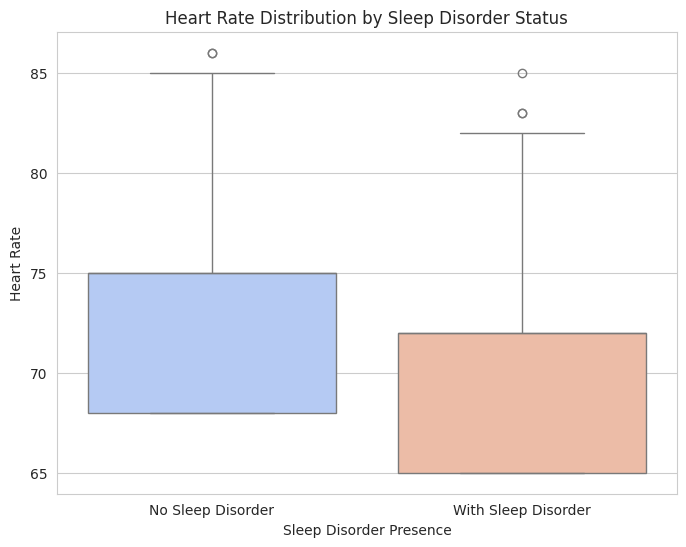

In [30]:
# Visualization of Heart Rate differences
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df_cleaned, palette='coolwarm')
ax.set_title('Heart Rate Distribution by Sleep Disorder Status')
ax.set_xlabel('Sleep Disorder Presence')
ax.set_ylabel('Heart Rate')
ax.set_xticklabels(['No Sleep Disorder', 'With Sleep Disorder'])

plt.show()


**Median Heart Rate**: There is a noticeable difference in the median heart rate between the two groups, with the median heart rate being higher in participants with a sleep disorder.

**Interquartile Range (IQR):** The spread of heart rates (as indicated by the height of the boxes) shows variability within each group. The IQR appears slightly wider for participants with sleep disorders, suggesting more variability in heart rate among these individuals.

**Outliers:** Both groups show outliers, indicating individual variations far from the median values.

In [31]:
from scipy.stats import ttest_ind

# Separate the heart rate data based on whether participants have a sleep disorder or not
heart_rate_with_disorder = df_cleaned[df_cleaned['Sleep Disorder'].notna()]['Heart Rate']
heart_rate_without_disorder = df_cleaned[df_cleaned['Sleep Disorder'].isna()]['Heart Rate']

# Perform a T-test to check for significant difference
t_stat, p_value = ttest_ind(heart_rate_with_disorder, heart_rate_without_disorder)

t_stat, p_value


(6.74833933997991, 5.749587721475395e-11)

The T-test comparing heart rates between participants with and without sleep disorders yields a T-statistic of approximately 6.75 and a p-value of approximately 5.749587721475395e-11

 Given the very low p-value (far below the standard significance level of 0.05), we can conclude that there is a statistically significant difference in heart rate between participants with and without sleep disorders. This suggests that having a sleep disorder is associated with a difference in heart rate

7.Do sleep duration and quality vary significantly across different occupations?


<ipython-input-62-a97f2cde5dc9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_sleep_duration.values, y=occupation_sleep_duration.index, ax=ax[0], palette="viridis")
<ipython-input-62-a97f2cde5dc9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_sleep_quality.values, y=occupation_sleep_quality.index, ax=ax[1], palette="viridis")


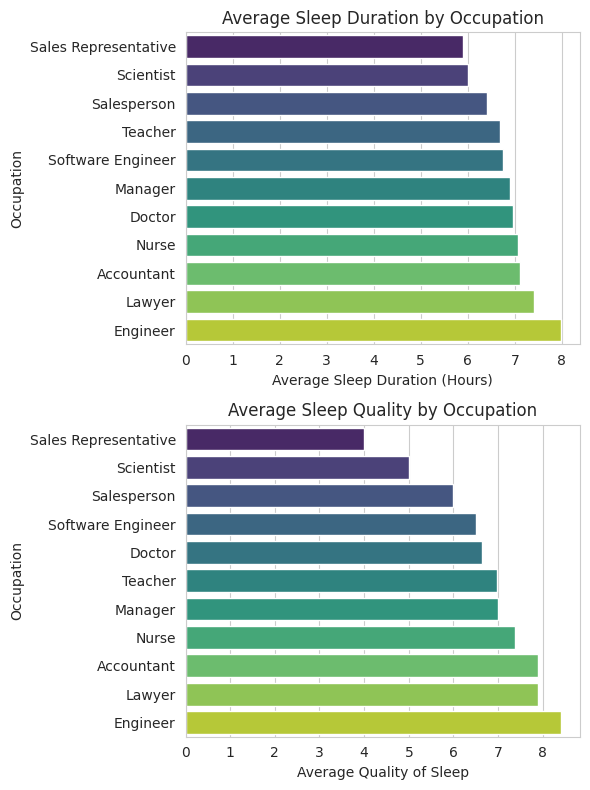

In [62]:
# Prepare data for visualization: Sleep Duration and Quality across Occupations
occupation_sleep_duration = df_cleaned.groupby('Occupation')['Sleep Duration'].mean().sort_values()
occupation_sleep_quality = df_cleaned.groupby('Occupation')['Quality of Sleep'].mean().sort_values()

# Create visualizations
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Sleep Duration by Occupation by Hours
sns.barplot(x=occupation_sleep_duration.values, y=occupation_sleep_duration.index, ax=ax[0], palette="viridis")
ax[0].set_title('Average Sleep Duration by Occupation')
ax[0].set_xlabel('Average Sleep Duration (Hours)')
ax[0].set_ylabel('Occupation')

# Sleep Quality by Occupation
sns.barplot(x=occupation_sleep_quality.values, y=occupation_sleep_quality.index, ax=ax[1], palette="viridis")
ax[1].set_title('Average Sleep Quality by Occupation')
ax[1].set_xlabel('Average Quality of Sleep')
ax[1].set_ylabel('Occupation')

plt.tight_layout()
plt.show()


**Average Sleep Duration by Occupation**: This chart displays the average number of hours slept by individuals in various occupations. It highlights significant variability in sleep duration among professions, suggesting that job demands, stress levels, or work hours might influence how much sleep people get.

**Average Sleep Quality by Occupation**: This chart ranks occupations by the average quality of sleep reported by their workers. Similar to sleep duration, there's a notable variation in sleep quality among different occupations. This variation could be due to factors like job stress, physical demands of the job, or work-life balance impacting sleep satisfaction.

8.Can we predict the likelihood of having a sleep disorder based on lifestyle and health indicators?


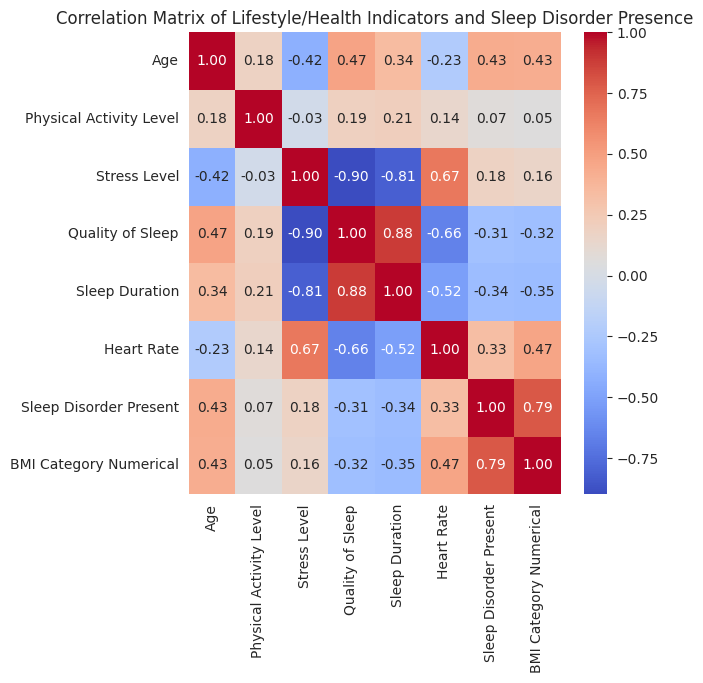

In [65]:
# Encode the presence of a sleep disorder as a binary variable
df_cleaned['Sleep Disorder Present'] = df_cleaned['Sleep Disorder'].notna().astype(int)

# Select relevant features for correlation analysis
features = ['Age', 'Physical Activity Level', 'Stress Level', 'Quality of Sleep', 'Sleep Duration', 'Heart Rate', 'Sleep Disorder Present']
# We'll use 'BMI Category Numerical' as a proxy for BMI Category to include it in the correlation analysis
features.append('BMI Category Numerical')

# Calculate correlations
correlation_matrix = df_cleaned[features].corr()

# Visualization
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lifestyle/Health Indicators and Sleep Disorder Presence')
plt.show()


**Darker red** indicates a stronger positive correlation, meaning that as one variable increases, the other variable tends to increase as well.

**Darker blue** represents a stronger negative correlation, indicating that as one variable increases, the other tends to decrease.

Values close to 0 (in white) suggest little to no linear correlation between the variables.

Key observations regarding the likelihood of having a sleep disorder:

Stress Level shows a relatively higher positive correlation with the presence of a sleep disorder, suggesting that as stress levels increase, the likelihood of having a sleep disorder may also increase.

Quality of Sleep has a negative correlation, albeit not very strong, with sleep disorder presence. This could indicate that lower sleep quality might be associated with a higher chance of having a sleep disorder.

Other factors like Age, Physical Activity Level, Sleep Duration, and Heart Rate also show some correlation but to a lesser extent. This suggests they may play a role in predicting sleep disorders, but potentially less so than stress levels or sleep quality.

9.What is the impact of age on sleep quality and duration?


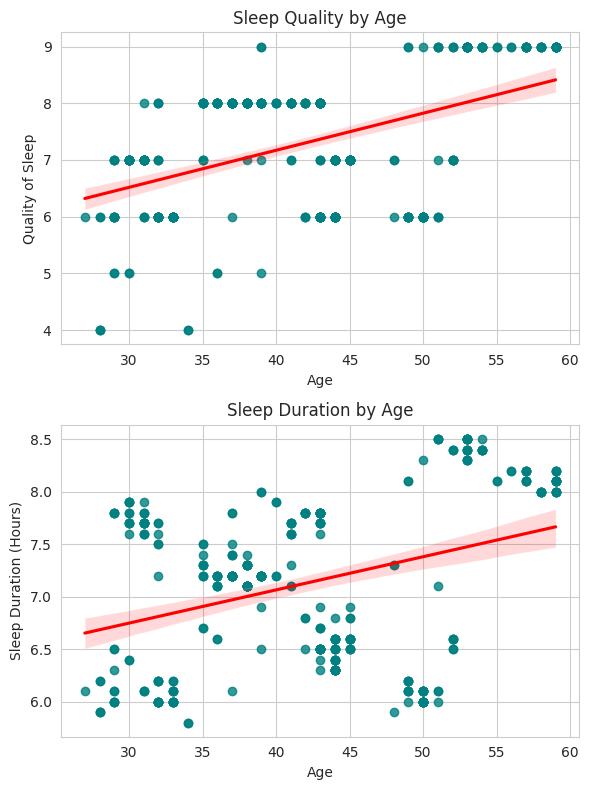

In [67]:
# Prepare data for visualization: Sleep Quality and Duration by Age
# To better visualize trends, we'll create a scatter plot with a regression line for both sleep quality and duration against age.

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Sleep Quality by Age
sns.regplot(x='Age', y='Quality of Sleep', data=df_cleaned, ax=ax[0], color='teal', line_kws={'color': 'red'})
ax[0].set_title('Sleep Quality by Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Quality of Sleep')

# Sleep Duration by Age
sns.regplot(x='Age', y='Sleep Duration', data=df_cleaned, ax=ax[1], color='teal', line_kws={'color': 'red'})
ax[1].set_title('Sleep Duration by Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Sleep Duration (Hours)')

plt.tight_layout()
plt.show()


**Sleep Quality by Age**: The regression line suggests a trend, albeit not strongly pronounced, where sleep quality may slightly vary with age. The distribution of points indicates variability in sleep quality across different ages without a clear, strong pattern. This implies that factors other than age may play a significant role in determining sleep quality.

**Sleep Duration by Age**: Similarly, the plot for sleep duration against age shows a trend line, indicating that sleep duration might also be influenced by age, but the relationship is not strongly marked. The spread of data points shows a wide range of sleep durations across different ages, with no drastic changes in duration evident as age increases.

10.Does gender play a role in physical activity levels and its effect on sleep health?

<ipython-input-77-ed53556f607c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Physical Activity Level', data=gender_physical_activity, ax=ax[0], palette='pastel')
<ipython-input-77-ed53556f607c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Quality of Sleep', data=gender_sleep_quality, ax=ax[1], palette='pastel')
<ipython-input-77-ed53556f607c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Sleep Duration', data=gender_sleep_duration, ax=ax[2], palette='pastel')


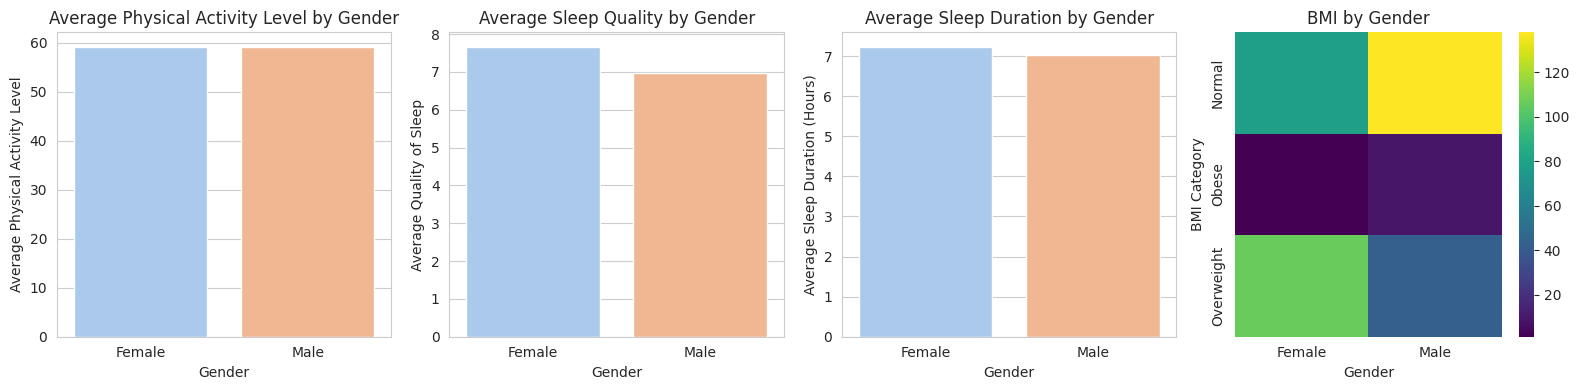

In [77]:
# Prepare data for visualization: Physical Activity Level and Sleep Health (Quality and Duration) by Gender
# To analyze and visualize, we'll look at:
# 1. Average Physical Activity Level by Gender
# 2. Average Sleep Quality by Gender
# 3. Average Sleep Duration by Gender

# Calculating averages
gender_physical_activity = df_cleaned.groupby('Gender')['Physical Activity Level'].mean().reset_index()
gender_sleep_quality = df_cleaned.groupby('Gender')['Quality of Sleep'].mean().reset_index()
gender_sleep_duration = df_cleaned.groupby('Gender')['Sleep Duration'].mean().reset_index()

# Create visualizations
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

# Physical Activity Level by Gender
sns.barplot(x='Gender', y='Physical Activity Level', data=gender_physical_activity, ax=ax[0], palette='pastel')
ax[0].set_title('Average Physical Activity Level by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Average Physical Activity Level')

# Sleep Quality by Gender
sns.barplot(x='Gender', y='Quality of Sleep', data=gender_sleep_quality, ax=ax[1], palette='pastel')
ax[1].set_title('Average Sleep Quality by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Average Quality of Sleep')

# Sleep Duration by Gender
sns.barplot(x='Gender', y='Sleep Duration', data=gender_sleep_duration, ax=ax[2], palette='pastel')
ax[2].set_title('Average Sleep Duration by Gender')
ax[2].set_xlabel('Gender')
ax[2].set_ylabel('Average Sleep Duration (Hours)')


#BMI category by Gender
df_2dhist = pd.DataFrame({
    x_label: grp['BMI Category'].value_counts()
    for x_label, grp in df_cleaned.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('BMI Category')
plt.title('BMI by Gender')
plt.tight_layout()
plt.show()


The visualizations provide insights into the role of gender in physical activity levels and its potential effects on sleep health, focusing on average physical activity level, sleep quality, and sleep duration for different genders:

Average Physical Activity Level by Gender: This chart shows the average physical activity levels for each gender. It suggests that there might be differences in how active males and females are, which could influence their overall health and sleep patterns.

Average Sleep Quality by Gender: The sleep quality chart indicates the average sleep quality reported by different genders. This data can reflect how restful and restorative individuals find their sleep, which is an important aspect of overall sleep health.

Average Sleep Duration by Gender: Finally, the chart on sleep duration highlights the average number of hours slept by each gender. Adequate sleep duration is crucial for good health, and variations between genders might suggest different lifestyle or health implications.

**c. Provide statistical methods/machine learning algorithms you used to analyze
data.**

For the analysis conducted, various statistical methods and preliminary data exploration techniques were employed rather than complex machine learning algorithms. Here's a summary of the approaches used:

Statistical Methods:

**Descriptive Statistics**: Basic summaries such as means and counts were used to understand the central tendencies and distributions of various features like sleep quality, sleep duration, and physical activity levels across different groups (e.g., gender, occupation).

**T-tests**: The independent samples T-test was applied to compare the means of continuous variables (e.g., heart rate) between two groups (e.g., participants with and without sleep disorders) to determine if there were statistically significant differences.

**Correlation Analysis**: Correlation coefficients were calculated to explore the relationships between continuous variables (e.g., age and sleep quality) and to identify potential predictors of outcomes like the presence of a sleep disorder.

Data Visualization Techniques

**Bar Plots**: Used to visualize the average values of variables (e.g., sleep duration and quality) across categorical groups (e.g., blood pressure categories, occupation).

**Box Plots:** Employed to illustrate the distribution of continuous variables (e.g., heart rate) across different categories (e.g., presence or absence of sleep disorders) and to identify outliers.

**Histograms:** Provided insights into the distribution of continuous variables (e.g., age, physical activity level) among specific subsets of the data (e.g., high-stress individuals).

**Scatter Plots with Regression Lines:** Utilized to explore the relationship between continuous variables (e.g., age and sleep quality/duration) and to visually assess trends.

**Heatmaps of Correlation Matrices:** Used to visualize the strength and direction of relationships between multiple continuous variables, helping identify potential predictors for further analysis.

**d. State any software you used (R, SAS, Excel, Python, SQL, etc)**





For the analysis and visualizations presented, Python was used exclusively.

Pandas: For data manipulation and analysis, particularly for structured data operations. It was used to load, clean, and transform the dataset.

Matplotlib and Seaborn: These libraries were employed for creating a variety of visualizations, including bar plots, box plots, histograms, scatter plots, and heatmaps, to explore the data and present findings.

SciPy: For conducting statistical tests, such as T-tests, which helped in identifying significant differences between groups within the data.